In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow.python.ops import array_ops
from PIL import Image as im

In [2]:
path = r'D:\examples\COCO_val2014_000000006894.jpg'

In [3]:
image_dir = tf.gfile.FastGFile(path,'rb').read()

In [4]:
def _ImageDimensions(image, rank):
    if image.get_shape().is_fully_defined():
        return image.get_shape().as_list()
    else:
        static_shape = image.get_shape().with_rank(rank).as_list()
        dynamic_shape = array_ops.unstack(array_ops.shape(image), rank)
        return [
            s if s is not None else d for s, d in zip(static_shape, dynamic_shape)
        ]

In [5]:
def width_gt_height(height,width):
#     left = tf.cast(tf.divide(tf.subtract(width,height),2),tf.float32)
#     right = tf.cast(tf.subtract(width,left),tf.float32)
#     top = tf.constant(0,dtype=tf.float32)
#     bottom = tf.cast(height,tf.float32)
    
    left = (width - height)//2
    right = (width -left)
    top = tf.constant(0,dtype=tf.int32)
    bottom = height
    
    return [left,right,top,bottom]

In [6]:
def height_gtoreq_width(height,width):
#     width = tf.cast(width,tf.float32)
#     height = tf.cast(height,tf.float32)
#     top = tf.cast(tf.divide(tf.subtract(height,width),2),tf.float32)
#     bottom = tf.cast(tf.subtract(height,top),tf.float32)
#     left = tf.constant(0,dtype=tf.float32)
#     right = tf.cast(width,tf.float32)
    

    top = (height -width) //2
    bottom = height -top
    left = tf.constant(0,dtype=tf.int32)
    right = width
    return [left,right,top,bottom]

In [7]:
def getFourCornerInfo(width,height):
    result = tf.cond(tf.less(height,width),lambda:width_gt_height(height,width),lambda:height_gtoreq_width(height,width),name="cond_size_pick")
    
#     a = tf.constant(0,dtype=tf.float32)
#     if tf.math.less(height,width) is True:
#         width = tf.cast(width,tf.float32)
#         height = tf.cast(height,tf.float32)
#         left = tf.cast(tf.divide(tf.subtract(width,height),2),tf.float32)
#         right = tf.cast(tf.subtract(width,left),tf.float32)
#         top = a
#         bottom = tf.cast(height,tf.float32)
#     else:
#         width = tf.cast(width,tf.float32)
#         height = tf.cast(height,tf.float32)
#         top = tf.cast(tf.divide(tf.subtract(height,width),2),tf.float32)
#         bottom = tf.cast(tf.subtract(height,top),tf.float32)
#         left = a
#         right = tf.cast(width,tf.float32)
    return result

In [8]:
image_data = tf.image.decode_jpeg(image_dir)
image = ops.convert_to_tensor(image_data, name='image')
image_shape = image.get_shape()
image_resize_1 = tf.image.resize_image_with_crop_or_pad(image_data,224,224)
if image_shape.ndims == 3:
    image = array_ops.expand_dims(image, 0)
_,height,width, _ = _ImageDimensions(image, rank=4)
left,right,top,bottom = getFourCornerInfo(width,height)
image = array_ops.squeeze(image,0)
image =tf.image.crop_to_bounding_box(image,top,left,bottom,right)
# image = tf.image.pad_to_bounding_box(image,top,left,bottom,right)
image =tf.image.resize_images(image,[224,224],method=0)
resized = tf.cast(image, tf.int32)

w,h-- [640, 480]
l,r,t,b-- [80, 560, 0, 480]


InvalidArgumentError: assertion failed: [width must be <= target - offset]
	 [[Node: pad_to_bounding_box/Assert_2/Assert = Assert[T=[DT_STRING], summarize=3, _device="/job:localhost/replica:0/task:0/device:CPU:0"](pad_to_bounding_box/GreaterEqual_2/_53, pad_to_bounding_box/Assert_2/Assert/data_0)]]

Caused by op 'pad_to_bounding_box/Assert_2/Assert', defined at:
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\asyncio\base_events.py", line 345, in run_forever
    self._run_once()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\asyncio\base_events.py", line 1312, in _run_once
    handle._run()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\asyncio\events.py", line 125, in _run
    self._callback(*self._args)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel\kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 1080, in __init__
    self.run()
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\IPython\core\interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\IPython\core\interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\IPython\core\interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\IPython\core\interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\IPython\core\interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-85a48a1b604f>", line 11, in <module>
    image = tf.image.pad_to_bounding_box(image,top,left,bottom,right)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\ops\image_ops_impl.py", line 710, in pad_to_bounding_box
    'width must be <= target - offset')
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\ops\image_ops_impl.py", line 78, in _assert
    return [control_flow_ops.Assert(cond, [msg])]
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 118, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 149, in Assert
    return gen_logging_ops._assert(condition, data, summarize, name="Assert")
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\ops\gen_logging_ops.py", line 51, in _assert
    name=name)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "f:\developmenttools\anaconda3\envs\tengpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): assertion failed: [width must be <= target - offset]
	 [[Node: pad_to_bounding_box/Assert_2/Assert = Assert[T=[DT_STRING], summarize=3, _device="/job:localhost/replica:0/task:0/device:CPU:0"](pad_to_bounding_box/GreaterEqual_2/_53, pad_to_bounding_box/Assert_2/Assert/data_0)]]


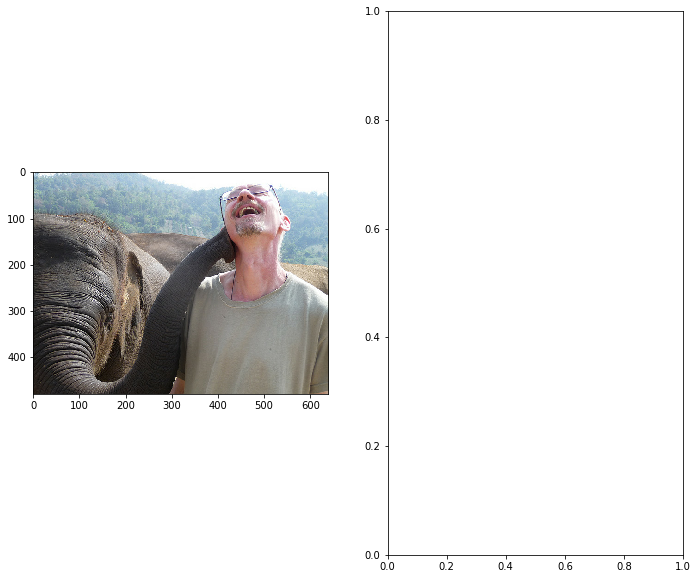

In [9]:
with tf.Session() as sess:
    print("w,h--",sess.run([width,height]))
    print("l,r,t,b--",sess.run([left,right,top,bottom]))
    plt.figure(1,figsize=[18,10])
    plt.subplot(131)
    plt.imshow(image_data.eval())
    plt.subplot(132)
    plt.imshow(resized.eval())
    plt.subplot(133)
    plt.imshow(image_resize_1.eval())
    plt.show()